# Solution with Yolo

In [1]:
# Définir le chemin du dossier contenant les fichiers PDF à traiter
cvs = 'C:/Users/asus tuf/Desktop/test-cap1/cvs'

In [2]:
import os

# Chemin du répertoire contenant les images
cvs = 'C:/Users/asus tuf/Desktop/test-cap1/cvs'

# Liste tous les fichiers du répertoire
file = os.listdir(cvs)

# Filtrer les fichiers pour ne conserver que ceux avec certaines extensions d'image (par exemple, .jpg, .jpeg, .png, .gif)
extensions_images = {'.jpg', '.jpeg', '.png', '.gif'}
images = [fichier for fichier in file if any(fichier.lower().endswith(ext) for ext in extensions_images)]

# Afficher les noms des images
for image in images:
    print(image)


00d69426-4c6a-4bf3-8baf-8db431b6ca01.jpg
01fdfbd8-2490-4086-a11f-9b08a60b94c0.jpg
02b4d355-3a3a-4e92-b10b-54c89a2310f3.jpg
02cad037-bf20-4bf4-9c7d-d95b67239ac5.jpg
04b3e6a6-96af-47c7-96ac-25eb4c8fc2e2.jpg
04fa318f-dbec-4014-9420-e5103bb54058.jpg
05a1ec4e-ffed-4745-a1a9-9805787c217a.jpg
0a8ba46d-c2e3-4152-a7b0-240be9ed9a5d.jpg
0b44371e-9ccd-4c5c-aac1-3a49bc3911f7.jpg
0bdfd699-c46a-4e65-be8f-a1ca7a744708.jpg
0d78a7e8-0b89-4c75-8646-7aef107a3341.jpg
0dad6723-bec7-41ce-8c93-d7ad58768272.jpg
0e318ead-743c-4d2e-a52e-d36cfdca2316.jpg
0ecf455e-5a85-4cee-984e-1d810a19e03b.jpg
1ab1badf-7a21-4be2-afc3-8ab04d908568.jpg
1ae8f13e-d4ef-4398-8e5f-313b2025972a.jpg
1bec202a-e28f-44e3-99a1-bfd77180a631.jpg
1d5da618-180b-4452-812d-d9b51e6d6a2f.jpg
1d6e11d9-4a0b-442e-965b-406e1bfbc5da.jpg
1d9a2b7c-a14b-4b82-8df0-0aa437446840.jpg
1de28a1b-3463-44b5-8203-9af7b0e2f16d.jpg
1defb81e-e0d9-4917-a9e2-44d5233f590f.jpg
1e18123b-b2bb-476a-a174-d6d7681e6ef6.jpg
1e7a35d3-2c06-49db-bffc-ee5533e4773e.jpg
1ea3ba3e-217a-4a

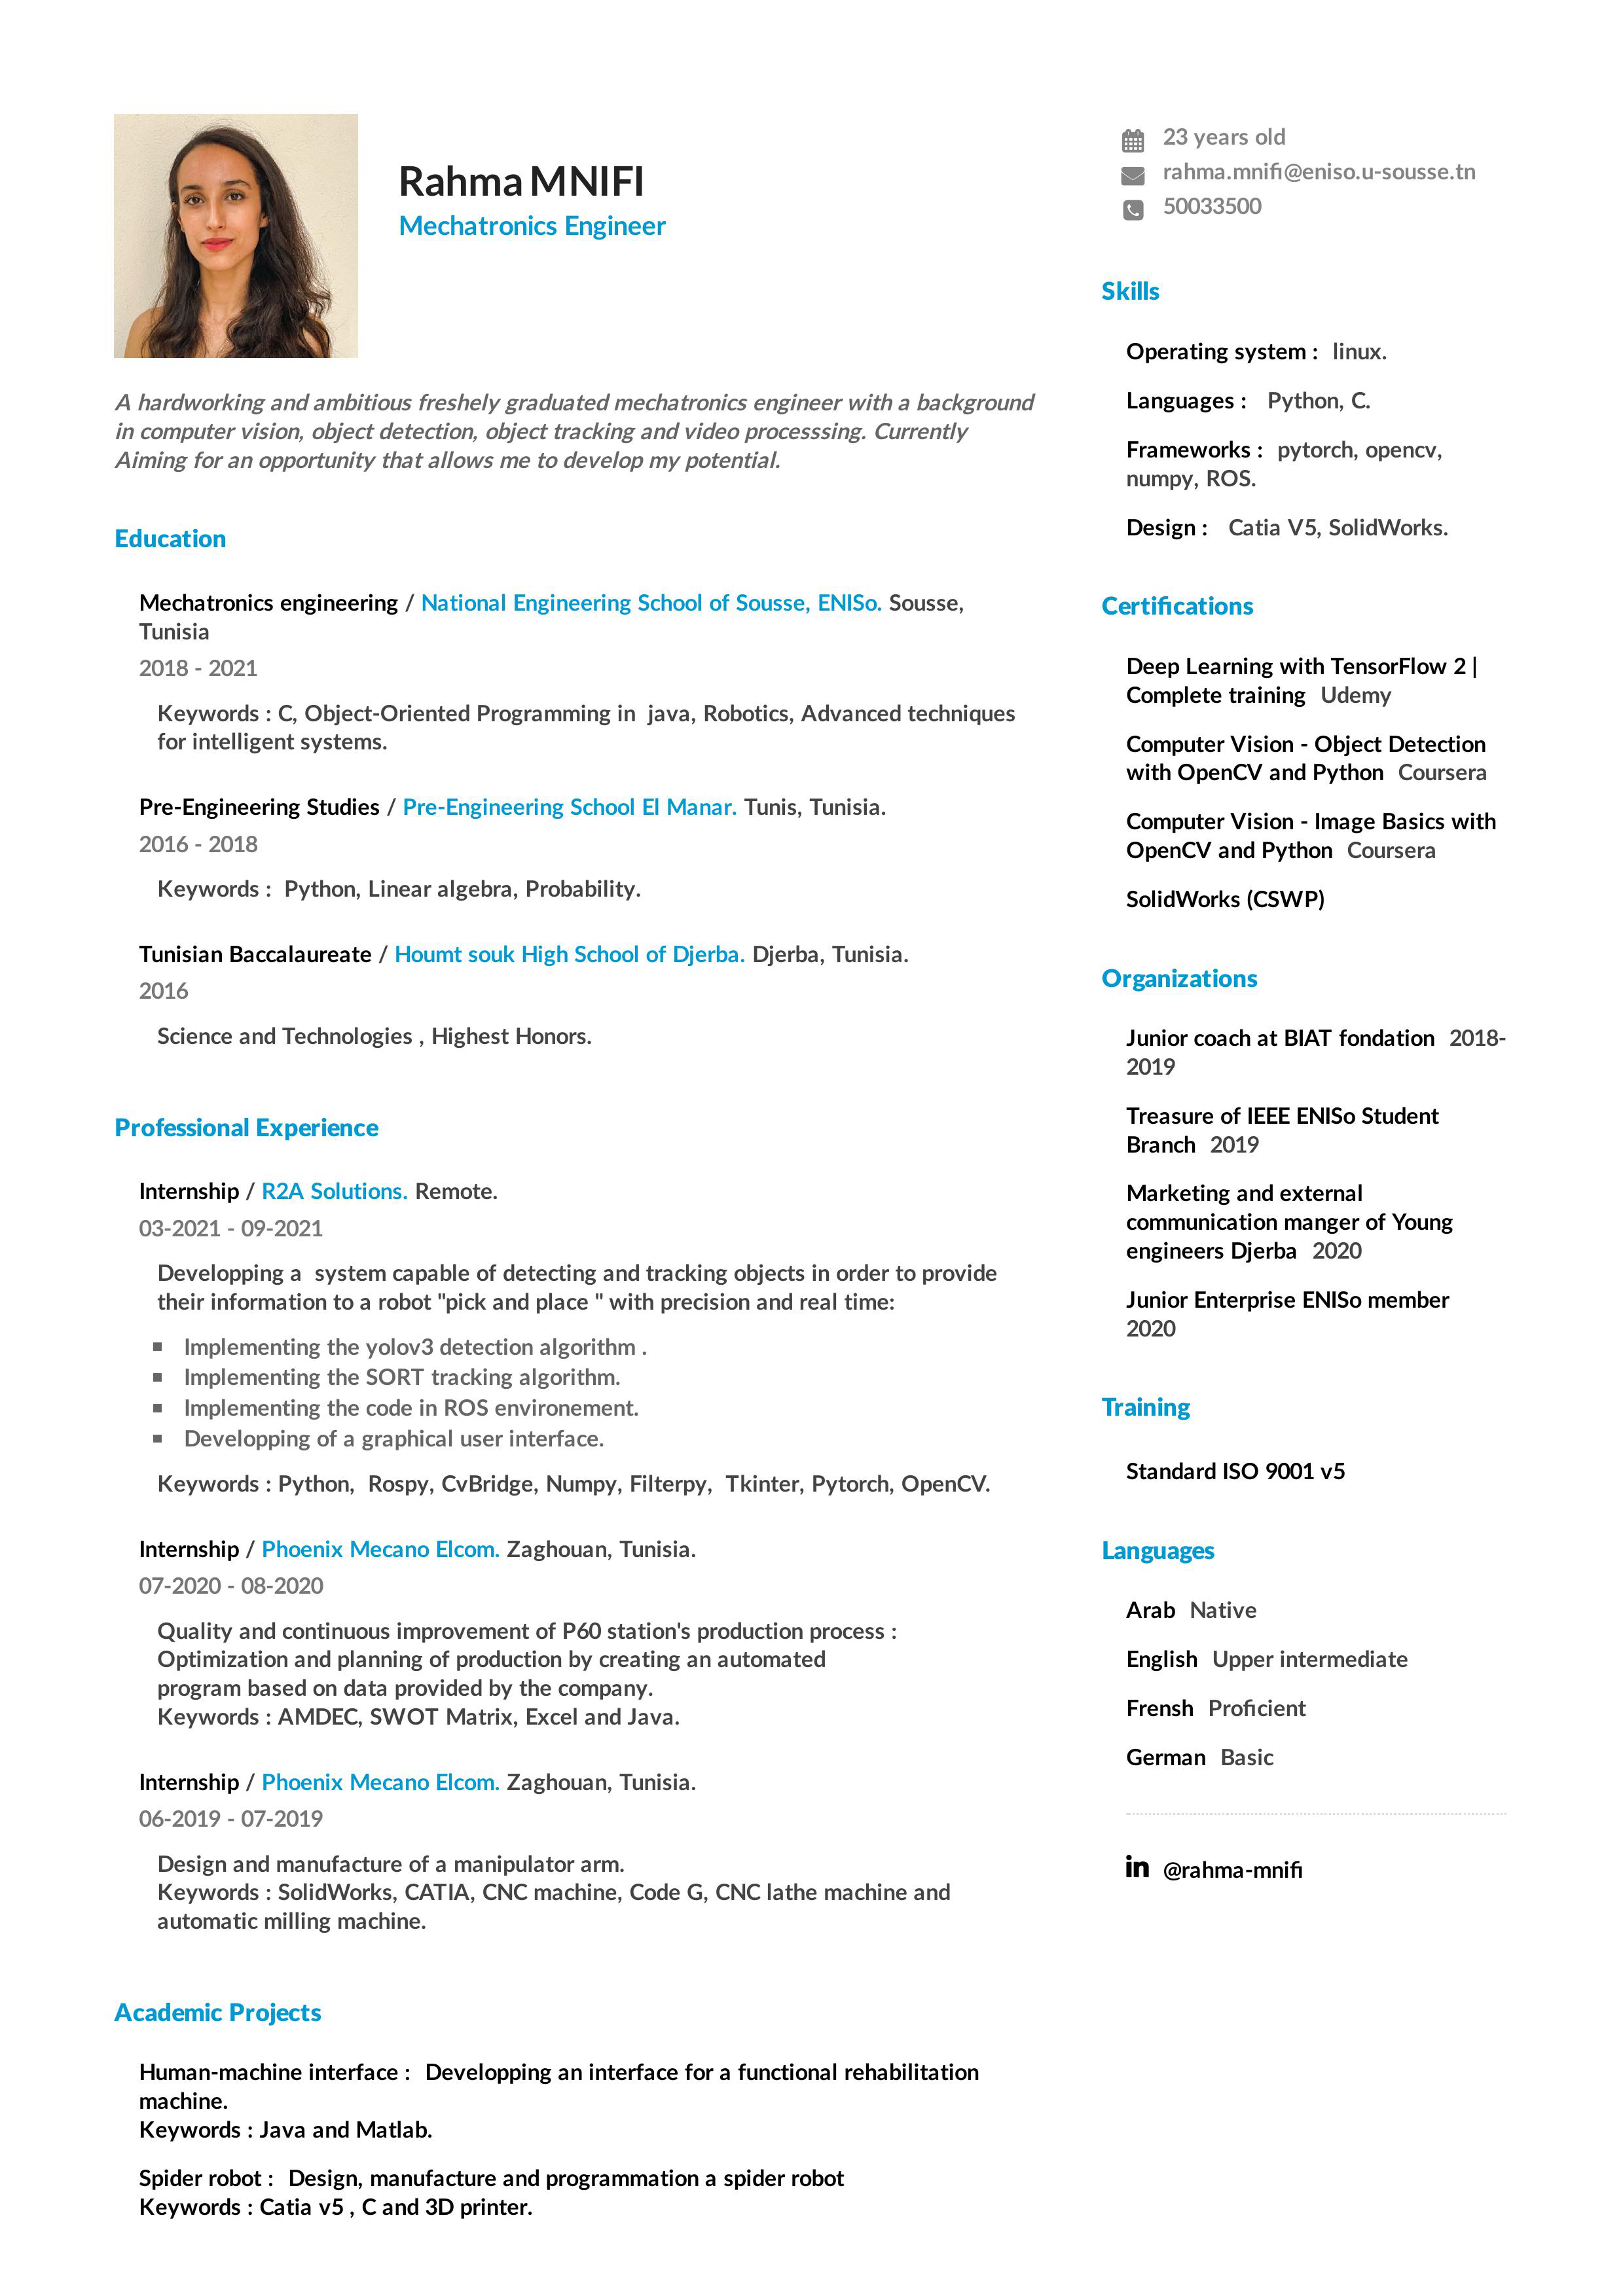

In [3]:
from PIL import Image
from IPython.display import display  # Cette ligne n'est nécessaire que dans un environnement IPython (comme Jupyter Notebook)

# Chemin de l'image à afficher
chemin_image = 'C:/Users/asus tuf/Desktop/test-cap1/cvs/2eaf3b75-8989-4982-b6ca-df1a8d3cbbab.jpg'  # Remplacez par le chemin réel de votre image

# Ouvrir l'image
image = Image.open(chemin_image)

# Afficher l'image
display(image)


In [7]:
pip install ultralytics.yolo


  Obtaining dependency information for build from https://files.pythonhosted.org/packages/93/dd/b464b728b866aaa62785a609e0dd8c72201d62c5f7c53e7c20f4dceb085f/build-1.0.3-py3-none-any.whl.metadata
  Obtaining dependency information for readme-renderer>=35.0 from https://files.pythonhosted.org/packages/b5/7e/992e0e21b37cadd668226f75fef0aa81bf21c2426c98bc06a55e514cb323/readme_renderer-42.0-py3-none-any.whl.metadata
  Obtaining dependency information for nh3>=0.2.14 from https://files.pythonhosted.org/packages/6b/d2/93c8c82464d9562eae68b8e442c00d5a0d1c6a2d74478642d8bd22b45aee/nh3-0.2.15-cp37-abi3-win_amd64.whl.metadata
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: HTTPSConnectionPool(host='files.pythonhosted.org', port=443): Max retries exceeded with url: /packages/93/dd/b464b728b866aaa62785a609e0dd8c72201d62c5f7c53e7c20f4dceb085f/build-1.0.3-py3-none-any.whl (Caused by NewConnectionError('<pip._vendor.urllib3.connection.HTTPSConnection object at 0x00000217943030D0>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))



In [6]:
from ultralytics import YOLO
from ultralytics.yolo.utils.ops import scale_image
import cv2
import numpy as np


def predict_on_image(model, img, conf):
    result = model(img, conf=conf)[0]

    # detection
    # result.boxes.xyxy   # box with xyxy format, (N, 4)
    cls = result.boxes.cls.cpu().numpy()    # cls, (N, 1)
    probs = result.boxes.conf.cpu().numpy()  # confidence score, (N, 1)
    boxes = result.boxes.xyxy.cpu().numpy()   # box with xyxy format, (N, 4)

    # segmentation
    masks = result.masks.masks.cpu().numpy()     # masks, (N, H, W)
    masks = np.moveaxis(masks, 0, -1) # masks, (H, W, N)
    # rescale masks to original image
    masks = scale_image(masks.shape[:2], masks, result.masks.orig_shape)
    masks = np.moveaxis(masks, -1, 0) # masks, (N, H, W)

    return boxes, masks, cls, probs


def overlay(image, mask, color, alpha, resize=None):
    """Combines image and its segmentation mask into a single image.
    https://www.kaggle.com/code/purplejester/showing-samples-with-segmentation-mask-overlay

    Params:
        image: Training image. np.ndarray,
        mask: Segmentation mask. np.ndarray,
        color: Color for segmentation mask rendering.  tuple[int, int, int] = (255, 0, 0)
        alpha: Segmentation mask's transparency. float = 0.5,
        resize: If provided, both image and its mask are resized before blending them together.
        tuple[int, int] = (1024, 1024))

    Returns:
        image_combined: The combined image. np.ndarray

    """
    color = color[::-1]
    colored_mask = np.expand_dims(mask, 0).repeat(3, axis=0)
    colored_mask = np.moveaxis(colored_mask, 0, -1)
    masked = np.ma.MaskedArray(image, mask=colored_mask, fill_value=color)
    image_overlay = masked.filled()

    if resize is not None:
        image = cv2.resize(image.transpose(1, 2, 0), resize)
        image_overlay = cv2.resize(image_overlay.transpose(1, 2, 0), resize)

    image_combined = cv2.addWeighted(image, 1 - alpha, image_overlay, alpha, 0)

    return image_combined

# Load a model
model = YOLO('runs/segment/train_640/weights/best.pt')

# load image by OpenCV like numpy.array
img = cv2.imread('cvs/2eaf3b75-8989-4982-b6ca-df1a8d3cbbab.jpg')

# predict by YOLOv8
boxes, masks, cls, probs = predict_on_image(model, img, conf=0.55)

# overlay masks on original image
image_with_masks = np.copy(img)
for mask_i in masks:
    image_with_masks = overlay(image_with_masks, mask_i, color=(0,255,0), alpha=0.3)

# Saving the image
cv2.imwrite('frame_00001_with_masks.PNG', image_with_masks)

ModuleNotFoundError: No module named 'ultralytics.yolo'

In [11]:
import json
import os

def convert_json_to_yolo(json_path, output_path, class_mapping):
    with open(json_path, 'r') as json_file:
        data = json.load(json_file)

    # Get image information
    image_path = data.get('imagePath', '')
    image_width = data.get('imageWidth', 1.0)
    image_height = data.get('imageHeight', 1.0)

    # Create YOLO format lines
    yolo_lines = []
    for shape in data.get('shapes', []):
        label = shape.get('label', '')
        if label in class_mapping:
            class_id = class_mapping[label]
            points = shape.get('points', [])

            # Convert bounding box to YOLO format
            x_center = (points[0][0] + points[1][0]) / (2 * image_width)
            y_center = (points[0][1] + points[1][1]) / (2 * image_height)
            width = (points[1][0] - points[0][0]) / image_width
            height = (points[1][1] - points[0][1]) / image_height

            yolo_lines.append(f"{class_id} {x_center} {y_center} {width} {height}")

    # Save YOLO format to a file
    output_file_path = os.path.join(output_path, os.path.basename(image_path).replace(".jpg", ".txt"))
    with open(output_file_path, 'w') as output_file:
        output_file.write("\n".join(yolo_lines))

    return output_file_path

# Example Usage
json_path = "labels/2eaf3b75-8989-4982-b6ca-df1a8d3cbbab.json"
output_path = "images"
class_mapping = {"bloc": 0, "Skills": 1, "Community": 2, "Certifications": 3, 
                 "Languages": 4, "Experience": 5, "Projects": 6, "Education": 7,
                 "nobloc": 8, "Interests": 9, "Contact": 10, "Picture": 11,
                 "Name": 12, "Profil": 13}

converted_file = convert_json_to_yolo(json_path, output_path, class_mapping)
print(f"Converted file saved at: {converted_file}")


Converted file saved at: images\2eaf3b75-8989-4982-b6ca-df1a8d3cbbab.txt


In [14]:
import cv2
import os

def visualize_annotations(image_path, yolo_path, output_path):
    # Load the image
    image = cv2.imread(image_path)

    # Get image dimensions
    img_height, img_width, _ = image.shape

    # Read YOLO format annotations
    with open(yolo_path, 'r') as yolo_file:
        lines = yolo_file.readlines()

    for line in lines:
        class_id, x_center, y_center, width, height = map(float, line.strip().split())

        # Convert YOLO format to image coordinates
        x = int((x_center - width / 2) * img_width)
        y = int((y_center - height / 2) * img_height)
        w = int(width * img_width)
        h = int(height * img_height)

        # Draw rectangle on the image
        color = (0, 255, 0)  # Green color for rectangles
        thickness = 2
        image = cv2.rectangle(image, (x, y), (x + w, y + h), color, thickness)

    # Ensure the output directory exists
    os.makedirs(output_path, exist_ok=True)

    # Save the output image
    output_image_path = os.path.join(output_path, os.path.basename(image_path))
    cv2.imwrite(output_image_path, image)
    print(f"Output image saved at: {output_image_path}")

#if __name__ == "__main__":
 #   image_path = 'C:/Users/asus tuf/Desktop/test-cap1/cvs/2eaf3b75-8989-4982-b6ca-df1a8d3cbbab.jpg'
  #  yolo_path = "images/2eaf3b75-8989-4982-b6ca-df1a8d3cbbab.txt"
  #  output_path = "images_seg"

# visualize_annotations(image_path, yolo_path, output_path)


Output image saved at: images_seg\2eaf3b75-8989-4982-b6ca-df1a8d3cbbab.jpg


In [15]:
image_path = 'C:/Users/asus tuf/Desktop/test-cap1/cvs/2eaf3b75-8989-4982-b6ca-df1a8d3cbbab.jpg'
yolo_path = "images/2eaf3b75-8989-4982-b6ca-df1a8d3cbbab.txt"
output_path = "images_seg"

visualize_annotations(image_path, yolo_path, output_path)

Output image saved at: images_seg\2eaf3b75-8989-4982-b6ca-df1a8d3cbbab.jpg


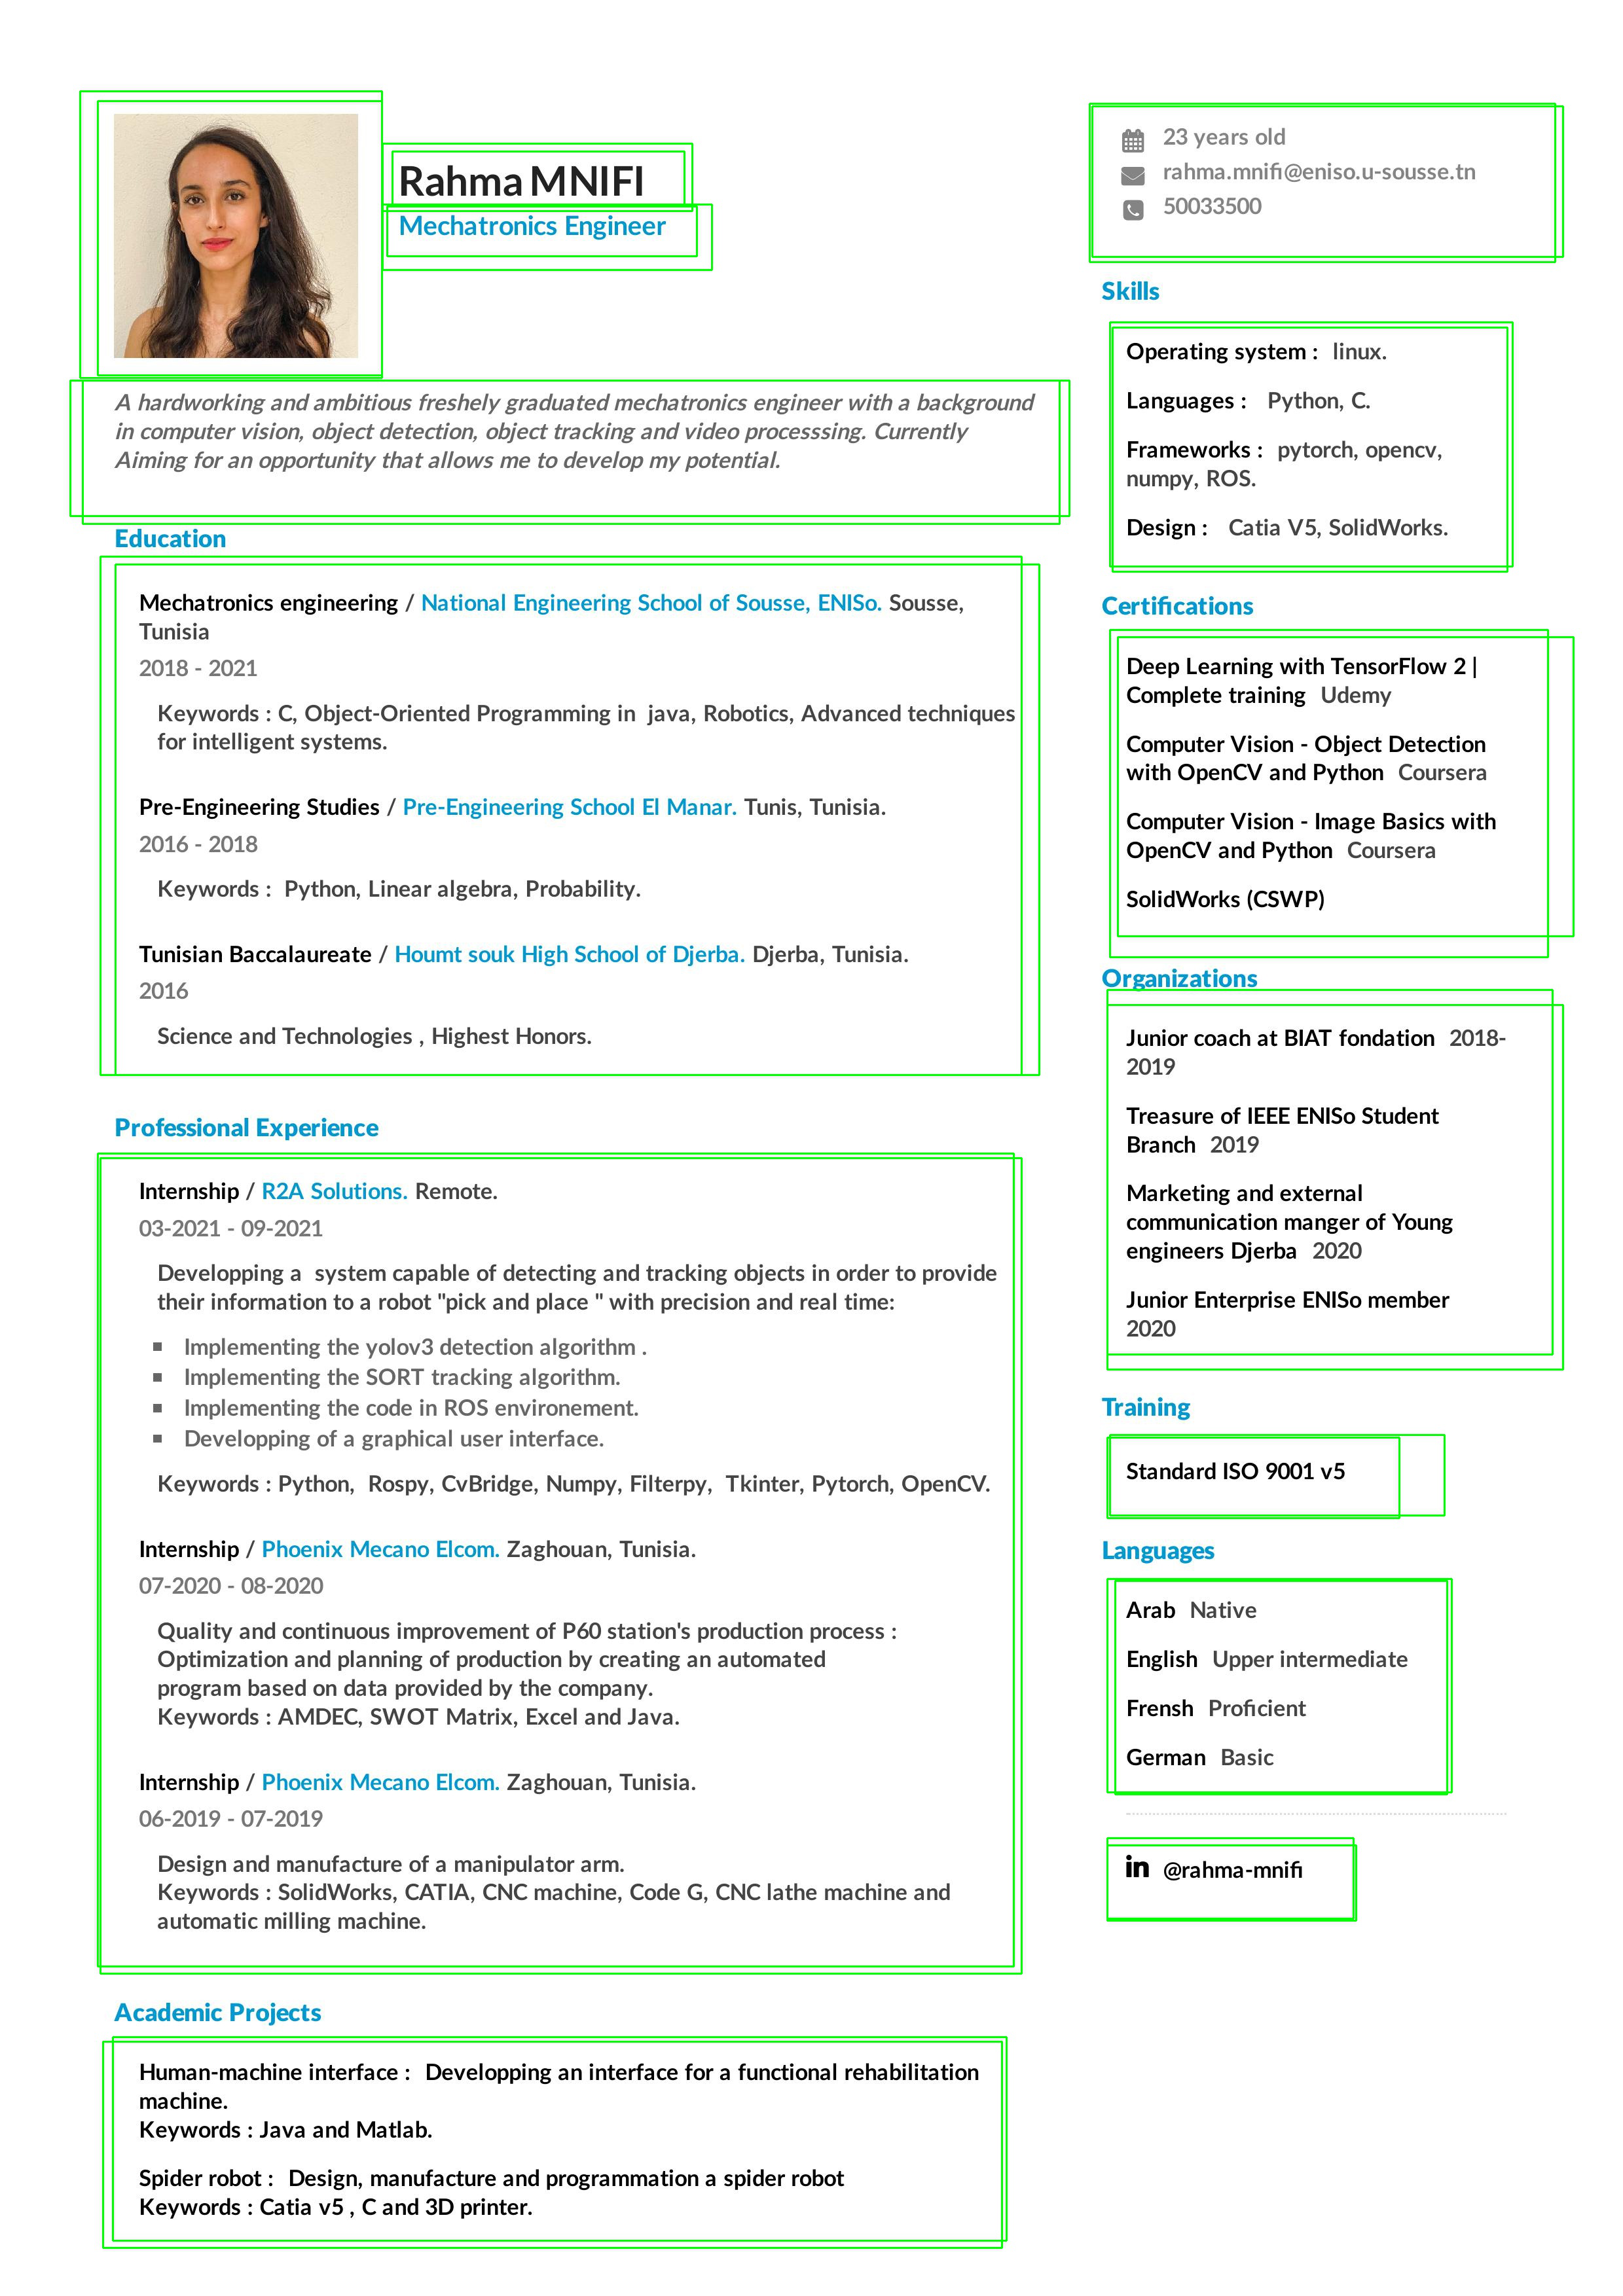

In [16]:
from PIL import Image
from IPython.display import display  # Cette ligne n'est nécessaire que dans un environnement IPython (comme Jupyter Notebook)

# Chemin de l'image à afficher
chemin_image = 'C:/Users/asus tuf/Desktop/test-cap1/images_seg/2eaf3b75-8989-4982-b6ca-df1a8d3cbbab.jpg'  # Remplacez par le chemin réel de votre image

# Ouvrir l'image
image = Image.open(chemin_image)

# Afficher l'image
display(image)


In [17]:
import cv2
import os
import csv

def visualize_annotations(image_path, yolo_path, output_path):
    # Load the image
    image = cv2.imread(image_path)

    # Get image dimensions
    img_height, img_width, _ = image.shape

    # Read YOLO format annotations
    with open(yolo_path, 'r') as yolo_file:
        lines = yolo_file.readlines()

    # Create CSV file
    csv_filename = os.path.join(output_path, 'annotations.csv')
    with open(csv_filename, mode='w', newline='') as csv_file:
        csv_writer = csv.writer(csv_file)
        csv_writer.writerow(['Class', 'X_center', 'Y_center', 'Width', 'Height'])  # Write header

        for line in lines:
            class_id, x_center, y_center, width, height = map(float, line.strip().split())

            # Convert YOLO format to image coordinates
            x = int((x_center - width / 2) * img_width)
            y = int((y_center - height / 2) * img_height)
            w = int(width * img_width)
            h = int(height * img_height)

            # Write row to CSV file
            csv_writer.writerow([class_id, x_center, y_center, width, height])

            # Draw rectangle on the image
            color = (0, 255, 0)  # Green color for rectangles
            thickness = 2
            image = cv2.rectangle(image, (x, y), (x + w, y + h), color, thickness)

    # Save the output image with rectangles
    output_image_path = os.path.join(output_path, 'output_image.jpg')
    cv2.imwrite(output_image_path, image)
    print(f"Output image with rectangles saved at: {output_image_path}")
    print(f"CSV file saved at: {csv_filename}")

# Example Usage
image_path = 'C:/Users/asus tuf/Desktop/test-cap1/cvs/2eaf3b75-8989-4982-b6ca-df1a8d3cbbab.jpg'
yolo_path = "images/2eaf3b75-8989-4982-b6ca-df1a8d3cbbab.txt"
output_path = "images_seg"

visualize_annotations(image_path, yolo_path, output_path)


Output image with rectangles saved at: images_seg\output_image.jpg
CSV file saved at: images_seg\annotations.csv


In [18]:
import csv

def read_annotations_csv(csv_path):
    with open(csv_path, 'r') as csv_file:
        csv_reader = csv.reader(csv_file)
        header = next(csv_reader)  # Read the header
        print(f"CSV Header: {header}")

        for row in csv_reader:
            print(row)

# Example Usage
csv_path = "images_seg/annotations.csv"
read_annotations_csv(csv_path)


CSV Header: ['Class', 'X_center', 'Y_center', 'Width', 'Height']
['0.0', '0.3457349427498681', '0.3553854925006578', '0.5678468365035528', '0.22585738093149724']
['0.0', '0.34263195457225304', '0.6793702306815191', '0.5647438483259378', '0.3541356021401631']
['0.0', '0.3403047134390418', '0.9342820805192525', '0.5538833897042852', '0.08990439435137278']
['0.0', '0.7886865051044155', '0.7341899833347951', '0.21255469016663037', '0.09319357951056931']
['0.0', '0.7723958171719365', '0.6437373914568897', '0.17997331430167252', '0.0350846416980966']
['0.0', '0.822819375058181', '0.5171037628278221', '0.2808204300741614', '0.15897728269450045']
['0.0', '0.8290253514134109', '0.3427769493904043', '0.2808204300741614', '0.13047101131479694']
['0.0', '0.8080801812145095', '0.19366722217349355', '0.24823905420920342', '0.1063503201473555']
['7.0', '0.355819654327117', '0.35703008508025613', '0.5693983305923604', '0.22256819577230066']
['5.0', '0.3457349427498681', '0.682111218314183', '0.5678468

In [19]:
import pandas as pd

def read_annotations_csv(csv_path):
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(csv_path)

    # Print the DataFrame
    print("CSV Data:")
    print(df)

# Example Usage
csv_path = "images_seg/annotations.csv"
read_annotations_csv(csv_path)


CSV Data:
    Class  X_center  Y_center     Width    Height
0     0.0  0.345735  0.355385  0.567847  0.225857
1     0.0  0.342632  0.679370  0.564744  0.354136
2     0.0  0.340305  0.934282  0.553883  0.089904
3     0.0  0.788687  0.734190  0.212555  0.093194
4     0.0  0.772396  0.643737  0.179973  0.035085
5     0.0  0.822819  0.517104  0.280820  0.158977
6     0.0  0.829025  0.342777  0.280820  0.130471
7     0.0  0.808080  0.193667  0.248239  0.106350
8     7.0  0.355820  0.357030  0.569398  0.222568
9     5.0  0.345735  0.682111  0.567847  0.355232
10    6.0  0.344959  0.931541  0.550780  0.088808
11    1.0  0.807304  0.195860  0.243585  0.106350
12    3.0  0.818941  0.345518  0.269960  0.142531
13    3.0  0.787135  0.642641  0.206349  0.035085
14    2.0  0.819716  0.510525  0.274614  0.158977
15    4.0  0.789462  0.735286  0.204797  0.093194
16    8.0  0.147919  0.103763  0.175319  0.119507
17    8.0  0.331771  0.077998  0.179973  0.024121
18    8.0  0.334099  0.101022  0.190834 

In [20]:
import networkx as nx
import pandas as pd
df = pd.read_csv("images_seg/annotations.csv")

In [21]:
df

Class  X_center  Y_center     Width    Height
0     0.0  0.345735  0.355385  0.567847  0.225857
1     0.0  0.342632  0.679370  0.564744  0.354136
2     0.0  0.340305  0.934282  0.553883  0.089904
3     0.0  0.788687  0.734190  0.212555  0.093194
4     0.0  0.772396  0.643737  0.179973  0.035085
5     0.0  0.822819  0.517104  0.280820  0.158977
6     0.0  0.829025  0.342777  0.280820  0.130471
7     0.0  0.808080  0.193667  0.248239  0.106350
8     7.0  0.355820  0.357030  0.569398  0.222568
9     5.0  0.345735  0.682111  0.567847  0.355232
10    6.0  0.344959  0.931541  0.550780  0.088808
11    1.0  0.807304  0.195860  0.243585  0.106350
12    3.0  0.818941  0.345518  0.269960  0.142531
13    3.0  0.787135  0.642641  0.206349  0.035085
14    2.0  0.819716  0.510525  0.274614  0.158977
15    4.0  0.789462  0.735286  0.204797  0.093194
16    8.0  0.147919  0.103763  0.175319  0.119507
17    8.0  0.331771  0.077998  0.179973  0.024121
18    8.0  0.334099  0.101022  0.190834  0.021928
19    8.0  0.351941  0.196956  0.601980  0.062495
20    8.0  0.818165  0.079094  0.290129  0.065784
21    8.0  0.759208  0.820257  0.153598  0.032892
22   11.0  0.142489  0.102118  0.186179  0.124989
23   12.0  0.330996  0.077449  0.190834  0.029603
24   13.0  0.337202  0.103215  0.203246  0.028506
25   13.0  0.351165  0.195312  0.615943  0.059205
26   10.0  0.815062  0.079642  0.287026  0.069073
27   10.0  0.758432  0.818064  0.152046  0.035085

In [37]:
import cv2
import os
import pytesseract

# Set Tesseract executable path
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

def extract_text_from_block(image, block_coordinates):
    x, y, w, h = block_coordinates
    block_image = image[y:y+h, x:x+w]
    text = pytesseract.image_to_string(block_image, config='--psm 6')  # Use OCR to extract text
    return text.strip()

def visualize_annotations(image_path, yolo_path, output_path):
    # Load the image
    image = cv2.imread(image_path)

    # Read YOLO format annotations
    with open(yolo_path, 'r') as yolo_file:
        lines = yolo_file.readlines()

    # Print the text content of each block with a title
    for idx, line in enumerate(lines):
        class_id, x_center, y_center, width, height = map(float, line.strip().split())

        # Convert YOLO format to image coordinates
        img_height, img_width, _ = image.shape
        x = int((x_center - width / 2) * img_width)
        y = int((y_center - height / 2) * img_height)
        w = int(width * img_width)
        h = int(height * img_height)

        # Extract text from the block
        block_coordinates = (x, y, w, h)
        block_content = extract_text_from_block(image, block_coordinates)

        # Print the text content of each block with a title
        print(f"Block {idx + 1} Content: {block_content}")

    # Save the output image with rectangles
    output_image_path = os.path.join(output_path, 'output_image.jpg')
    cv2.imwrite(output_image_path, image)
    print(f"Output image with rectangles saved at: {output_image_path}")

# Example Usage
image_path = 'C:/Users/asus tuf/Desktop/test-cap1/cvs/2eaf3b75-8989-4982-b6ca-df1a8d3cbbab.jpg'
yolo_path = "images/2eaf3b75-8989-4982-b6ca-df1a8d3cbbab.txt"
output_path = "images_seg"

visualize_annotations(image_path, yolo_path, output_path)


Block 1 Content: Mechatronics engineering / Nationa! Engineering Schoo! of Sousse, ENISo. Sousse,
Tunisia
2018 - 2021
Keywords : C, Object-Oriented Programming in java, Robotics, Advanced techniques
for intelligent systems.
Pre-Engineering Studies / Pre-Engineering School E! Manar. Tunis, Tunisia.
2016 - 2018
Keywords : Python, Linear algebra, Probability.
Tunisian Baccalaureate / Houmt souk High School of Djerba. Djerba, Tunisia.
2016
Science and Technologies , Highest Honors.
Block 2 Content: Internship / R2A Solutions. Remote.
03-2021 - 09-2021
Developping a system capable of detecting and tracking objects in order to provide
their information to a robot "pick and place " with precision and real time:
= Implementing the yolov3 detection algorithm .
= Implementing the SORT tracking algorithm.
= Implementing the code in ROS environement.
= Developping of a graphical user interface.
Keywords : Python, Rospy, CvBridge, Numpy, Filterpy, Tkinter, Pytorch, OpenCV.
Internship / Phoenix Meca

In [45]:
import cv2
import os
import csv
import pytesseract
from pytesseract import Output

# Set Tesseract executable path
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

def extract_text_from_block(image, block_coordinates):
    x, y, w, h = block_coordinates
    block_image = image[y:y+h, x:x+w]
    text = pytesseract.image_to_string(block_image, config='--psm 6')  # Use OCR to extract text
    return text.strip()

def visualize_annotations(image_path, yolo_path, output_path):
    # Load the image
    image = cv2.imread(image_path)

    # Get image dimensions
    img_height, img_width, _ = image.shape

    # Read YOLO format annotations
    with open(yolo_path, 'r') as yolo_file:
        lines = yolo_file.readlines()

    # Create CSV file
    csv_filename = os.path.join(output_path, 'data.csv')
    with open(csv_filename, mode='w', newline='', encoding='utf-8') as csv_file:
        csv_writer = csv.writer(csv_file)

        # Write header
        csv_writer.writerow(['Block'] + [f'Content_{idx + 1}' for idx in range(len(lines))])

        # Write content to each block's column
        for idx, line in enumerate(lines):
            class_id, x_center, y_center, width, height = map(float, line.strip().split())

            # Convert YOLO format to image coordinates
            x = int((x_center - width / 2) * img_width)
            y = int((y_center - height / 2) * img_height)
            w = int(width * img_width)
            h = int(height * img_height)

            # Extract text from the block
            block_coordinates = (x, y, w, h)
            block_content = extract_text_from_block(image, block_coordinates)

            # Draw rectangle on the image
            color = (0, 255, 0)  # Green color for rectangles
            thickness = 2
            image = cv2.rectangle(image, (x, y), (x + w, y + h), color, thickness)

            # Write row to CSV file
            csv_writer.writerow([f'Block {idx + 1}'] + [block_content])

    # Save the output image with rectangles
    output_image_path = os.path.join(output_path, 'output_image.jpg')
    cv2.imwrite(output_image_path, image)
    print(f"Output image with rectangles saved at: {output_image_path}")
    print(f"CSV file saved at: {csv_filename}")

# Example Usage
image_path = 'C:/Users/asus tuf/Desktop/test-cap1/cvs/2eaf3b75-8989-4982-b6ca-df1a8d3cbbab.jpg'
yolo_path = "images/2eaf3b75-8989-4982-b6ca-df1a8d3cbbab.txt"
output_path = "images_seg"

visualize_annotations(image_path, yolo_path, output_path)


Output image with rectangles saved at: images_seg\output_image.jpg
CSV file saved at: images_seg\data.csv


In [46]:
import networkx as nx
import pandas as pd
df = pd.read_csv("images_seg/data.csv")
df

Block                                          Content_1  Content_2  \
0    Block 1  Mechatronics engineering / Nationa! Engineerin...        NaN   
1    Block 2  Internship / R2A Solutions. Remote.\n03-2021 -...        NaN   
2    Block 3  Human-machine interface : Developping an inter...        NaN   
3    Block 4  Arab Native\n\nEnglish Upper intermediate\nFre...        NaN   
4    Block 5                               Standard ISO 9001 v5        NaN   
5    Block 6  Junior coach at BIAT fondation 2018-\n2019\n\n...        NaN   
6    Block 7  Deep Learning with TensorFlow 2 |\nComplete tr...        NaN   
7    Block 8  Operating system: linux.\nLanguages: Python, C...        NaN   
8    Block 9  Mechatronics engineering / Nationa! Engineerin...        NaN   
9   Block 10  Internship / R2A Solutions. Remote.\n03-2021 -...        NaN   
10  Block 11  Human-machine interface : Developping an inter...        NaN   
11  Block 12  Operating system: linux.\nLanguages: Python, C...        NaN   
12  Block 13  Deep Learning with TensorFlow 2 |\nComplete tr...        NaN   
13  Block 14                               Standard ISO 9001 v5        NaN   
14  Block 15  Junior coach at BIAT fondation 2018-\n2019\n\n...        NaN   
15  Block 16  Arab Native\n\nEnglish Upper intermediate\nFre...        NaN   
16  Block 17                     a\n ——e\niA y q\nif ¢ \ ‘\nb )        NaN   
17  Block 18                                        Rahma MNIFI        NaN   
18  Block 19                              Mechatronics Engineer        NaN   
19  Block 20  A hardworking and ambitious freshely graduated...        NaN   
20  Block 21  #3 23 years old\n@ rahma.mnifi@eniso.u-sousse....        NaN   
21  Block 22                                    in @rahma-mnifi        NaN   
22  Block 23                           _ oo,\nA— q\niv "4\nh s)        NaN   
23  Block 24                                        Rahma MNIFI        NaN   
24  Block 25                              Mechatronics Engineer        NaN   
25  Block 26  A hardworking and ambitious freshely graduated...        NaN   
26  Block 27  #3 23 years old\n@ rahma.mnifi@eniso.u-sousse....        NaN   
27  Block 28                                    in @rahma-mnifi        NaN   

    Content_3  Content_4  Content_5  Content_6  Content_7  Content_8  \
0         NaN        NaN        NaN        NaN        NaN        NaN   
1         NaN        NaN        NaN        NaN        NaN        NaN   
2         NaN        NaN        NaN        NaN        NaN        NaN   
3         NaN        NaN        NaN        NaN        NaN        NaN   
4         NaN        NaN        NaN        NaN        NaN        NaN   
5         NaN        NaN        NaN        NaN        NaN        NaN   
6         NaN        NaN        NaN        NaN        NaN        NaN   
7         NaN        NaN        NaN        NaN        NaN        NaN   
8         NaN        NaN        NaN        NaN        NaN        NaN   
9         NaN        NaN        NaN        NaN        NaN        NaN   
10        NaN        NaN        NaN        NaN        NaN        NaN   
11        NaN        NaN        NaN        NaN        NaN        NaN   
12        NaN        NaN        NaN        NaN        NaN        NaN   
13        NaN        NaN        NaN        NaN        NaN        NaN   
14        NaN        NaN        NaN        NaN        NaN        NaN   
15        NaN        NaN        NaN        NaN        NaN        NaN   
16        NaN        NaN        NaN        NaN        NaN        NaN   
17        NaN        NaN        NaN        NaN        NaN        NaN   
18        NaN        NaN        NaN        NaN        NaN        NaN   
19        NaN        NaN        NaN        NaN        NaN        NaN   
20        NaN        NaN        NaN        NaN        NaN        NaN   
21        NaN        NaN        NaN        NaN        NaN        NaN   
22        NaN        NaN        NaN        NaN        NaN        NaN   
23        NaN   

In [29]:
def extract_text_from_block(image, block_coordinates):
    x, y, w, h = block_coordinates
    block_image = image[y:y+h, x:x+w]
    text = pytesseract.image_to_string(block_image, config='--psm 6')  # Use OCR to extract text
    return text.strip()

In [32]:
# Convert YOLO format to image coordinates
with open(yolo_path, 'r') as yolo_file:
        lines = yolo_file.readlines()
class_id, x_center, y_center, width, height = map(float, line.strip().split())
x = int((x_center - width / 2) * img_width)
y = int((y_center - height / 2) * img_height)
w = int(width * img_width)
h = int(height * img_height)
 # Extract text from the block
block_coordinates = (x, y, w, h)
block_content = extract_text_from_block(image, block_coordinates)

     
           

NameError: name 'line' is not defined

In [54]:
import cv2
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'


# Load the image
image = cv2.imread('images_seg/2eaf3b75-8989-4982-b6ca-df1a8d3cbbab.jpg')

# Get image dimensions
img_height, img_width, _ = image.shape
yolo_path = "images/2eaf3b75-8989-4982-b6ca-df1a8d3cbbab.txt"
# Read YOLO format annotations
with open(yolo_path, 'r') as yolo_file:
    lines = yolo_file.readlines()

# Loop through each bounding box
for line  in lines:
    with open(yolo_path, 'r') as yolo_file:
        lines = yolo_file.readlines()
    class_id, x_center, y_center, width, height = map(float, line.strip().split())

    # Convert YOLO format to (x, y, w, h)
    x = int((x_center - width / 2) * img_width)
    y = int((y_center - height / 2) * img_height)
    w = int(width * img_width)
    h = int(height * img_height)

    # Extract the ROI for text extraction
    roi = image[y:y+h, x:x+w]

    # Perform OCR to extract text
    text = pytesseract.image_to_string(roi)

    # Extract the sentence above the bounding box (you may need to adjust this based on your image layout)
    sentence_above_box = pytesseract.image_to_string(image[y-50:y, x:x+w])

    # Generate a title based on the extracted sentence
    title = f"Title: {sentence_above_box.strip()}"

    # Print or store the results
    print(title)
    print("Content:", text)
    print("="*30)


Title: Education
Content: Mechatronics engineering / National Engineering Schoo! of Sousse, ENISo. Sousse,
Tunisia
2018 - 2021

Keywords : C, Object-Oriented Programming in java, Robotics, Advanced techniques
for intelligent systems.

Pre-Engineering Studies / Pre-Engineering School El Manar. Tunis, Tunisia.
2016 - 2018

Keywords : Python, Linear algebra, Probability.

Tunisian Baccalaureate / Houmt souk High Schoo! of Djerba. Djerba, Tunisia.
2016

Science and Technologies , Highest Honors.


Title: Froressional Experience
Content: Internship / R2A Solutions. Remote.
03-2021 - 09-2021

Developping a system capable of detecting and tracking objects in order to provide
their information to a robot "pick and place " with precision and real time:

= Implementing the yolov3 detection algorithm .
= Implementing the SORT tracking algorithm.

= Implementing the code in ROS environement.
= Developping of a graphical user interface.

Keywords : Python, Rospy, CvBridge, Numpy, Filterpy, Tkinter,

In [55]:
import cv2
import pytesseract
import sys

# Set the path to Tesseract OCR
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

# Load the image
image = cv2.imread('images_seg/2eaf3b75-8989-4982-b6ca-df1a8d3cbbab.jpg')

# Get image dimensions
img_height, img_width, _ = image.shape
yolo_path = "images/2eaf3b75-8989-4982-b6ca-df1a8d3cbbab.txt"
output_file_path = "yolo_text.txt"  # Specify the path for the output file

# Open the output file in write mode
with open(output_file_path, 'w') as output_file:
    # Read YOLO format annotations
    with open(yolo_path, 'r') as yolo_file:
        lines = yolo_file.readlines()

    # Loop through each bounding box
    for line in lines:
        class_id, x_center, y_center, width, height = map(float, line.strip().split())

        # Convert YOLO format to (x, y, w, h)
        x = int((x_center - width / 2) * img_width)
        y = int((y_center - height / 2) * img_height)
        w = int(width * img_width)
        h = int(height * img_height)

        # Extract the ROI for text extraction
        roi = image[y:y + h, x:x + w]

        # Perform OCR to extract text
        text = pytesseract.image_to_string(roi)

        # Extract the sentence above the bounding box (you may need to adjust this based on your image layout)
        sentence_above_box = pytesseract.image_to_string(image[y - 50:y, x:x + w])

        # Generate a title based on the extracted sentence
        title = f"Title: {sentence_above_box.strip()}"

        # Store the results in the output file
        output_file.write(title + "\n")
        output_file.write("Content: " + text + "\n")
        output_file.write("=" * 30 + "\n")

# Notify the user that the process is complete
print("Output saved to", output_file_path)


Output saved to yolo_text.txt


In [57]:
# Read content from the file
file_path = 'yolo_text.txt'
with open(file_path, 'r') as file:
    file_content = file.read()

In [59]:
import csv
from io import StringIO

# Fonction pour extraire les titres et le contenu
def extract_titles_and_content(text):
    sections = [section.strip() for section in text.split("\n\n")]
    data = {}
    for section in sections:
        lines = section.split('\n')
        title = lines[0].strip()
        content = '\n'.join(lines[1:]).strip()
        data[title] = content
    return data

# Fonction pour créer un ensemble de données
def create_dataset(titles, data):
    dataset = {}
    for title in titles:
        dataset[title] = data.get(title, '')
    return dataset

# Extraire tous les titres du texte
titles = list(extract_titles_and_content(file_content).keys())

# Extraire les données du texte
data = extract_titles_and_content(text)

# Créer un ensemble de données
dataset = create_dataset(titles, data)

# Créer un fichier CSV à partir de l'ensemble de données
output_csv_file = 'data1.csv'
with open(output_csv_file, 'w', newline='', encoding='utf-8') as csv_file:
    csv_writer = csv.writer(csv_file)
    
    # Écrire les en-têtes de colonne
    csv_writer.writerow(titles)
    
    # Écrire les valeurs dans chaque colonne
    csv_writer.writerow([dataset[title] for title in titles])

print(f"Le fichier CSV '{output_csv_file}' a été créé.")


Le fichier CSV 'data1.csv' a été créé.


In [60]:
import networkx as nx
import pandas as pd
df = pd.read_csv("data1.csv")
df

Title: Education  \
0               NaN   

   Keywords : C, Object-Oriented Programming in java, Robotics, Advanced techniques  \
0                                                NaN                                  

   Pre-Engineering Studies / Pre-Engineering School El Manar. Tunis, Tunisia.  \
0                                                NaN                            

   Keywords : Python, Linear algebra, Probability.  \
0                                              NaN   

   Tunisian Baccalaureate / Houmt souk High Schoo! of Djerba. Djerba, Tunisia.  \
0                                                NaN                             

   Science and Technologies , Highest Honors.  ==============================  \
0                                         NaN                             NaN   

   Developping a system capable of detecting and tracking objects in order to provide  \
0                                                NaN                                    

   = Implementing the yolov3 detection algorithm .  \
0                                              NaN   

   = Implementing the code in ROS environement.  ...  \
0                                           NaN  ...   

   Computer Vision - Object Detection  Computer Vision - Image Basics with  \
0                                 NaN                                  NaN   

   SolidWorks (CSWP)  Languages: Python, C.  Frameworks : pytorch, opencv,  \
0                NaN                    NaN                            NaN   

   Design: Catia V5, SolidWorks.  07-2020 - 08-2020  \
0                            NaN                NaN   

   program based on data provided by the company.  \
0                                             NaN   

   Design and manufacture of a manipulator arm.  50033500  
0                                           NaN       NaN  

[1 rows x 32 columns]

In [62]:
# Fonction pour extraire les titres
def extract_titles(text):
    lines = text.split('\n')
    titles = [line.split(":")[1].strip() for line in lines if line.startswith("Title")]
    return titles

# Extraire les titres du texte
titles = extract_titles(file_content)

# Afficher les titres
print("Liste des titres :")
print(titles)


Liste des titres :
['Education', 'Froressional Experience', 'ACAGCMC FrOjJeces', '-ANSuUAgses', 'a cay', 'J¥rganizations', 'Cr lilitaliVvils', 'PINES', 'Education', 'FPPOUImssIVllal LAPCIiICHice', 'Academic Projects', '', '-ertifications', 'raining', 'organizations', 'dilsudgses', '', '', 'RANMA IVIINIFI', '', '', '', '', '', 'RanMa VINIFI', '', '', '']


In [63]:
df = pd.DataFrame(columns=titles)

# Affichage du DataFrame
print(df)

Empty DataFrame
Columns: [Education, Froressional Experience, ACAGCMC FrOjJeces, -ANSuUAgses, a cay, J¥rganizations, Cr lilitaliVvils, PINES, Education, FPPOUImssIVllal LAPCIiICHice, Academic Projects, , -ertifications, raining, organizations, dilsudgses, , , RANMA IVIINIFI, , , , , , RanMa VINIFI, , , ]
Index: []

[0 rows x 28 columns]


In [64]:
df

Empty DataFrame
Columns: [Education, Froressional Experience, ACAGCMC FrOjJeces, -ANSuUAgses, a cay, J¥rganizations, Cr lilitaliVvils, PINES, Education, FPPOUImssIVllal LAPCIiICHice, Academic Projects, , -ertifications, raining, organizations, dilsudgses, , , RANMA IVIINIFI, , , , , , RanMa VINIFI, , , ]
Index: []

[0 rows x 28 columns]

In [65]:
df.columns

Index(['Education', 'Froressional Experience', 'ACAGCMC FrOjJeces',
       '-ANSuUAgses', 'a cay', 'J¥rganizations', 'Cr lilitaliVvils', 'PINES',
       'Education', 'FPPOUImssIVllal LAPCIiICHice', 'Academic Projects', '',
       '-ertifications', 'raining', 'organizations', 'dilsudgses', '', '',
       'RANMA IVIINIFI', '', '', '', '', '', 'RanMa VINIFI', '', '', ''],
      dtype='object')